# Import Library

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Import Dataset

In [287]:
df = pd.read_csv('used_device_data.csv')
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


# Cek tipe Data

In [288]:
df.dtypes

device_brand              object
os                        object
screen_size              float64
4g                        object
5g                        object
rear_camera_mp           float64
front_camera_mp          float64
internal_memory          float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

# Cek data yang kosong

In [289]:
df.isna().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

# Mengisi data yang koson dengan nilai modus

In [290]:
modus_rear_camera = df['rear_camera_mp'].mode()[0]
df['rear_camera_mp'] = df['rear_camera_mp'].fillna(modus_rear_camera)

In [291]:
modus_front_camera = df['front_camera_mp'].mode()[0]
df['front_camera_mp'] = df['front_camera_mp'].fillna(modus_front_camera)

In [292]:
modus_internal_memory = df['internal_memory'].mode()[0]
df['internal_memory'] = df['internal_memory'].fillna(modus_internal_memory)

In [293]:
modus_ram = df['ram'].mode()[0]
df['ram'] = df['ram'].fillna(modus_ram)

In [294]:
modus_battery = df['battery'].mode()[0]
df['battery'] = df['battery'].fillna(modus_battery)

In [295]:
modus_weight = df['weight'].mode()[0]
df['weight'] = df['weight'].fillna(modus_weight)

In [296]:
df.isna().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [297]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,13.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


# Deskiripsi Data

In [298]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.643654,6.553329,54.528428,4.036080,3134.908078,182.685495,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.754206,6.968453,84.933275,1.364314,1299.054664,88.335850,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,10.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


# Mencari Outlier

Menghitung IQR normalized_used_price

In [299]:
Q1 = df['normalized_used_price'].quantile(0.25)
Q3 = df['normalized_used_price'].quantile(0.75)
IQR = Q3 - Q1

print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

Kuartil 1 =  4.0339308525
Kuartil 3 =  4.7557000075
IQR =  0.7217691549999996


Menghitung nilai MIN MAX IQR normalized_used_price

In [300]:
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR Minimum = ', min_IQR)
print('IQR Maksimum = ', max_IQR)

IQR Minimum =  2.9512771200000008
IQR Maksimum =  5.838353739999999


In [301]:
#outliers = df[(df['normalized_used_price'] < min_IQR) | (df['normalized_used_price'] > max_IQR)]
#print("Outliers:")
#print(outliers)

Menghitung nilai MIN MAX normalized_used_price

In [302]:
nilai_min = df.normalized_used_price.min()
nilai_max = df.normalized_used_price.max()

print('Nilai MIN = ', nilai_min)
print('Nilai MAX = ', nilai_max)

Nilai MIN =  1.53686722
Nilai MAX =  6.619433002


Mengecek Data Outlier normalized_used_price

In [303]:
if(nilai_max < min_IQR):
    print('DItemukan low outlier')
else:
    print('Tidak ditemukan low outlier')
    
    
if(nilai_max > max_IQR):
    print('DItemukan high outlier')
else:
    print('Tidak ditemukan high outlier')

Tidak ditemukan low outlier
DItemukan high outlier


# Menampilkan Data Outlier normalized_used_price

In [304]:
low  = []
high = []

for i in df.normalized_used_price:
    if (i < min_IQR):
        low.append(i)
    if (i > max_IQR):
        high.append(i)
        
print('Low outlier  = ', low)
print('High outlier = ', high)

Low outlier  =  [2.386926241, 2.856470206, 2.910174385, 2.729159164, 2.721295428, 2.896464272, 1.572773928, 2.853015971, 2.519308077, 2.564949357, 2.789322921, 2.667228207, 2.822568655, 2.863343086, 2.506341931, 2.779440197, 1.617406082, 2.335052283, 2.83085763, 2.842581094, 2.630448955, 2.915606229, 2.888147063, 2.212660385, 1.53686722, 2.337952237, 2.714694744, 2.709382646, 2.460443178, 2.23644529, 2.68988623, 2.911807039, 2.466403178, 2.333114298, 2.063058062, 2.242835089, 2.315501318, 2.800325477, 2.884800713, 2.85819286, 2.877511642, 2.35991016, 2.429217744, 2.621038824, 2.584751985, 2.889816048, 2.842581094, 2.735665368, 2.945491057, 2.351375257, 2.383242996, 2.753023567, 2.715356776, 2.346601978, 2.714694744, 2.691243083, 2.935982269, 2.267993648, 2.343727036, 2.71866038, 2.765060456, 2.934920134, 2.587011873, 2.935451343, 2.93385687, 2.033397603, 2.323367632, 2.396985768, 2.05284086, 2.855895328, 2.660259537, 2.851284369, 2.868466923, 2.834389123]
High outlier =  [6.153455837, 

In [305]:
print('Low outlier  = ')
df[df['normalized_used_price'].isin(low)]

Low outlier  = 


,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
104,Micromax,Android,7.75,no,no,0.3,0.3,0.50,0.25,1500.0,89.0,2014,956,2.386926,3.664843
105,Micromax,Android,10.03,no,no,2.0,0.3,0.20,0.25,2000.0,85.0,2013,680,2.856470,4.244631
113,Nokia,Others,5.18,no,no,0.3,0.0,0.10,0.03,1020.0,90.5,2020,272,2.910174,3.399863
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,4.00,1020.0,91.3,2020,288,2.729159,2.911263
117,Nokia,Others,5.18,yes,no,0.3,0.0,16.00,0.02,1200.0,86.5,2019,234,2.721295,3.688379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,Samsung,Others,7.62,no,no,2.0,1.3,16.00,4.00,1000.0,89.2,2013,542,2.855895,4.073972
2762,Spice,Android,7.75,no,no,1.3,0.3,512.00,0.25,2100.0,158.0,2013,794,2.660260,3.732657
2902,Others,Android,7.75,no,no,2.0,0.3,16.00,4.00,2000.0,118.0,2013,861,2.851284,3.900355
2911,Others,Android,7.75,no,no,2.0,1.3,16.00,4.00,2100.0,105.0,2014,955,2.868467,3.885268


In [306]:
print('high outlier  = ')
df[df['normalized_used_price'].isin(high)]

high outlier  = 


,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
34,Huawei,Android,16.71,yes,yes,10.5,16.0,256.0,8.0,4200.0,226.0,2020,120,6.153456,7.244220
198,Xiaomi,Android,20.12,yes,yes,12.0,20.0,512.0,12.0,4050.0,241.0,2019,478,6.619433,7.823342
263,Huawei,Android,16.59,yes,yes,13.0,16.0,512.0,12.0,4500.0,198.0,2019,488,5.995954,7.439289
388,Apple,Others,30.71,yes,no,12.0,7.0,128.0,6.0,9720.0,641.0,2020,220,5.847392,6.907335
645,Apple,iOS,27.94,yes,no,12.0,7.0,1024.0,4.0,7812.0,468.0,2018,525,6.158969,6.778899
1262,Huawei,Android,20.32,yes,no,13.0,16.0,512.0,4.0,4500.0,295.0,2019,434,5.887797,7.741043
1272,Huawei,Android,16.23,yes,no,13.0,24.0,256.0,4.0,4200.0,187.0,2018,365,6.109092,7.377940
2135,Oppo,Android,16.31,yes,no,13.0,16.0,512.0,4.0,3400.0,186.0,2018,623,6.143348,7.209651
2358,Samsung,Android,17.86,yes,no,12.0,9.0,512.0,4.0,4380.0,263.0,2019,428,5.978658,7.468045
3207,Huawei,Android,20.32,yes,yes,10.5,16.0,512.0,8.0,4500.0,300.0,2020,248,6.500448,7.847841


In [307]:
top_10_data = df.nlargest(10, 'normalized_used_price')

In [308]:
selected_columns = ['release_year', 'ram', 'normalized_used_price' ]

In [309]:
display(top_10_data[selected_columns])

,release_year,ram,normalized_used_price
198,2019,12.0,6.619433
3207,2020,8.0,6.500448
645,2018,4.0,6.158969
34,2020,8.0,6.153456
2135,2018,4.0,6.143348
1272,2018,4.0,6.109092
263,2019,12.0,5.995954
2358,2019,4.0,5.978658
3348,2020,8.0,5.959251
1262,2019,4.0,5.887797


In [310]:
df.to_csv("dataclean.csv", index=False)

# Hierarchical Clustering

In [311]:
X = df.iloc[:,[8 , 11 , 13]].values
X

array([[3.00000000e+00, 2.02000000e+03, 4.30757245e+00],
       [8.00000000e+00, 2.02000000e+03, 5.16209665e+00],
       [8.00000000e+00, 2.02000000e+03, 5.11108377e+00],
       ...,
       [3.00000000e+00, 2.02000000e+03, 4.35734965e+00],
       [2.00000000e+00, 2.02000000e+03, 4.34976167e+00],
       [2.00000000e+00, 2.02000000e+03, 4.13212193e+00]])

In [312]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Euclidean distance')

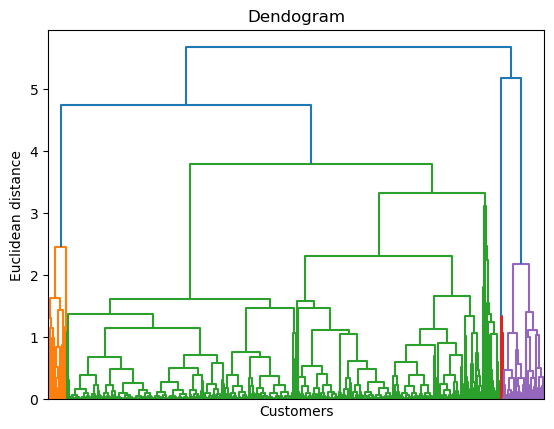

In [313]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='average', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

In [314]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='manhattan')
hc.fit(X)

C:\Users\MSI BRAVO\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=3)

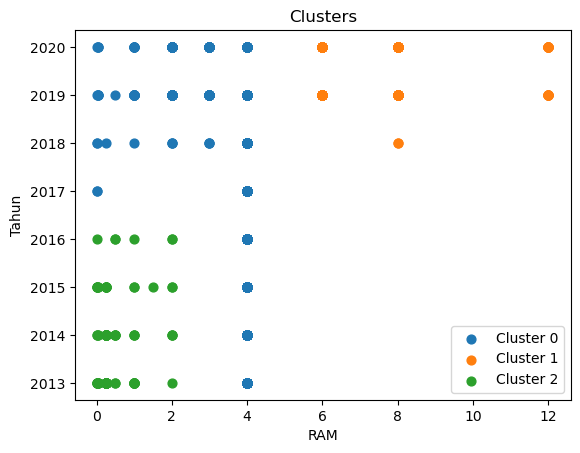

In [315]:
for i in range(hc.n_clusters_):
    plt.scatter(X[hc.labels_ == i, 0], X[hc.labels_ == i, 1], s=40, label='Cluster ' + str(i))
    
plt.title('Clusters')
plt.xlabel('RAM')
plt.ylabel('Tahun')
plt.legend()